# Urban Canyons Plantary Bounday Layer Investigation 

In [1]:
import xarray as xr
from xarray.backends import NetCDF4DataStore
import act
import glob
import act
import numpy as np
import matplotlib.pyplot as plt
import metpy

In [2]:
humboldt = sorted(glob.glob("/nfs/gce/projects/crocus/UIUC_SONDE_QC_V1/netcdf/20240722*Abizu*"))

In [3]:
humboldt

['/nfs/gce/projects/crocus/UIUC_SONDE_QC_V1/netcdf/20240722_1206_AbizuCamposHSQC.nc',
 '/nfs/gce/projects/crocus/UIUC_SONDE_QC_V1/netcdf/20240722_1627_AbizuCamposHSQC.nc',
 '/nfs/gce/projects/crocus/UIUC_SONDE_QC_V1/netcdf/20240722_1730_AbizuCamposHSQC.nc',
 '/nfs/gce/projects/crocus/UIUC_SONDE_QC_V1/netcdf/20240722_1848_AbizuCamposHSQC.nc']

In [4]:
ds_hum = xr.open_dataset(humboldt[1])

In [5]:
ds_hum

<xarray.Dataset> Size: 201kB
Dimensions:         (time: 2388, obs: 1)
Coordinates:
  * time            (time) datetime64[ns] 19kB 1969-12-31T23:43:21 ... 1970-0...
    lat             (time) float32 10kB ...
    lon             (time) float32 10kB ...
    gpsalt          (time) float32 10kB ...
Dimensions without coordinates: obs
Data variables: (12/27)
    trajectory      |S1 1B ...
    launch_time     datetime64[ns] 8B ...
    pres            (time) float32 10kB ...
    tdry            (time) float32 10kB ...
    dp              (time) float32 10kB ...
    rh              (time) float32 10kB ...
    ...              ...
    reference_rh    (obs) float32 4B ...
    reference_wspd  (obs) float32 4B ...
    reference_wdir  (obs) float32 4B ...
    reference_lat   (obs) float32 4B ...
    reference_lon   (obs) float32 4B ...
    reference_alt   (obs) float32 4B ...
Attributes: (12/92)
    Conventions:            CF-1.6
    RepoRevision:           V4.0.3
    RepoLastChangedDate:    Fri Jul 26 07:44:35 2024 -0600
    RepoId:                 65dfb63f5d4a9b50ff8e64bae2d6296ac25ab232
    RepoBranch:             ventura-build
    featureType:            trajectory
    ...                     ...
    WindQCDev:              3
    WindQCWL:               10
    WindSats:               4
    WindSmoothWL:           40
    WindVVPresWL:           5
    WindVVdelta:            2.5

In [6]:
joe = metpy.calc.gradient_richardson_number(ds_hum.alt, ds_hum.theta_e, ds_hum.u_wind, ds_hum.v_wind)

/tmp/ipykernel_3401879/2316821242.py:1: UserWarning: Vertical dimension number not found. Defaulting to initial dimension.
  joe = metpy.calc.gradient_richardson_number(ds_hum.alt, ds_hum.theta_e, ds_hum.u_wind, ds_hum.v_wind)


Text(0, 0.5, 'Altitude [m]')

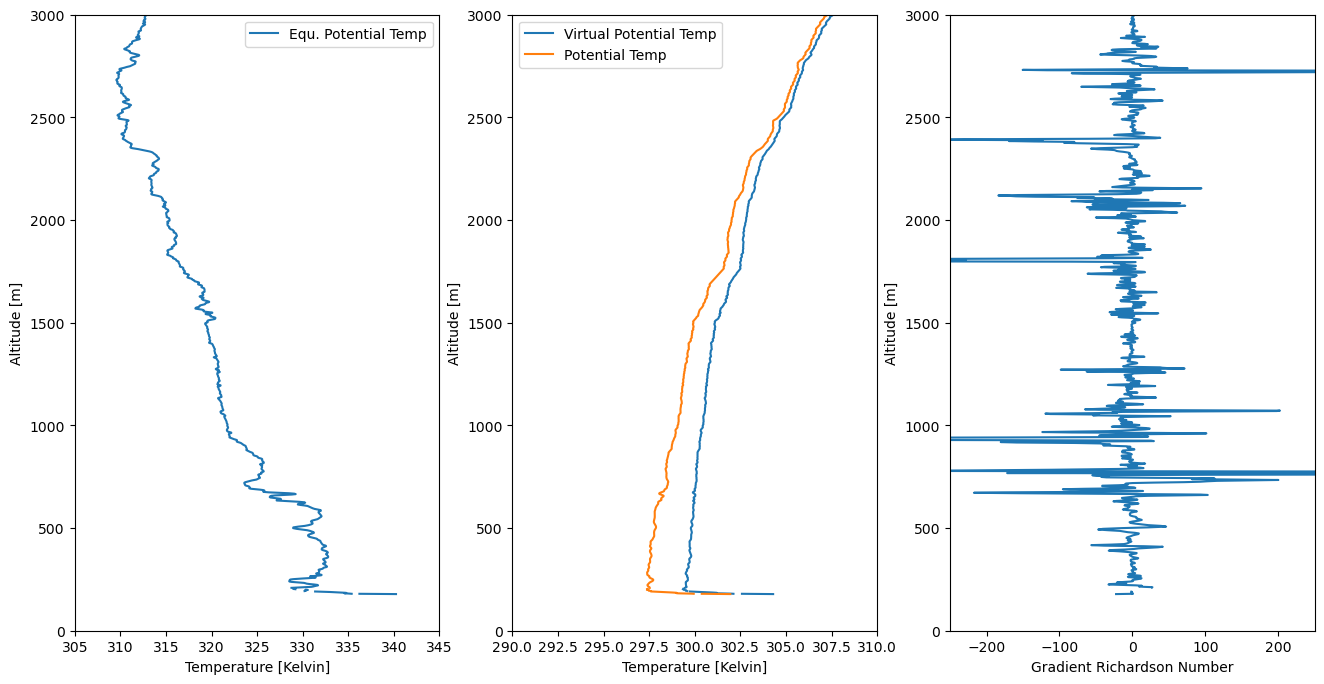

In [7]:
fig, axarr = plt.subplots(1, 3, figsize=[16, 8])

axarr[0].plot(ds_hum.theta_e, ds_hum.alt, label="Equ. Potential Temp")
axarr[0].set_ylim([0, 3000])
axarr[0].set_xlim([305, 345])
axarr[0].set_xlabel("Temperature [Kelvin]")
axarr[0].set_ylabel("Altitude [m]")
axarr[0].legend(loc='upper right')

axarr[1].plot(ds_hum.theta_v, ds_hum.alt, label="Virtual Potential Temp")
axarr[1].plot(ds_hum.theta, ds_hum.alt, label="Potential Temp")
axarr[1].set_ylim([0, 3000])
axarr[1].set_xlim([290, 310])
axarr[1].set_xlabel("Temperature [Kelvin]")
axarr[1].set_ylabel("Altitude [m]")
axarr[1].legend(loc='upper left')

axarr[2].plot(joe, ds_hum.alt,)
#axarr[2].plot(ds_hum.theta, ds_hum.alt, label="Potential Temp")
axarr[2].set_ylim([0, 3000])
axarr[2].set_xlim([-250, 250])
axarr[2].set_xlabel("Gradient Richardson Number")
axarr[2].set_ylabel("Altitude [m]")

In [8]:
joe

Magnitude,[-22.427053451538086 -14.224739074707031 -4.904191017150879 ... 5.979540824890137 0.27282699942588806 -6.35748291015625]
Units,dimensionless


In [9]:
bin_edges = np.arange(200, 20000 + 100, 25)

In [10]:
kat = joe.groupby_bins("gpsalt", bins=bin_edges).mean()

In [11]:
kat

<xarray.DataArray (gpsalt_bins: 795)> Size: 3kB
<Quantity([ 6.50660181e+00 -8.21008301e+00  4.75474644e+00  2.19136924e-01
  6.40861630e-01 -1.46927983e-01  1.10762167e+00 -9.63064957e+00
 -2.24710011e+00 -4.20820951e+00 -4.09744680e-01 -2.09575005e+01
  2.03728065e+01  5.56287718e+00 -5.49817920e-01 -4.02678967e+00
 -2.11008430e+00 -9.44273663e+00 -2.57208042e+01 -3.06034317e+01
 -4.91936064e+00  8.91386337e+01  2.60672119e+02 -5.20968475e+01
  9.97896492e-01 -5.78609848e+00 -8.24096012e+00 -4.03891659e+00
 -6.20454483e+01 -2.31303452e+02 -1.59478979e+01  1.46358907e+00
 -6.96215248e+00 -7.70119715e+00  6.28366089e+00 -3.01724186e+01
 -1.08907795e+01  1.89606237e+00 -4.42515135e+00 -2.43631721e+00
  1.73637938e+00 -4.51053238e+00 -7.27041864e+00  1.13271627e+01
 -1.21345794e+00 -1.40980208e+00 -3.94661903e-01 -3.00808287e+00
 -5.00152826e-01 -4.28188419e+00 -5.51481187e-01 -1.46781504e-01
  3.03173661e+00 -4.52100563e+00 -8.41163063e+00  9.07814598e+00
 -6.19628143e+00  5.91584444e+00 -4.16158628e+00 -6.10649157e+00
 -6.56086731e+00 -1.00069065e+01 -1.54864597e+01 -4.25127525e+01
 -2.96023773e+02 -6.28249311e+00  9.70051670e+00  6.76458895e-01
  2.99745822e+00 -5.45365429e+00 -5.79801750e+00  3.36959720e+00
 -1.58310986e+01  1.24047995e+01 -1.48775320e+01 -1.48772230e+01
 -9.94552612e+01 -1.89233005e+00  8.89579105e+00 -2.43427062e+00
...
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan], 'dimensionless')>
Coordinates:
  * gpsalt_bins  (gpsalt_bins) object 6kB (200, 225] ... (20050, 20075]

Text(0, 0.5, 'Altitude [m]')

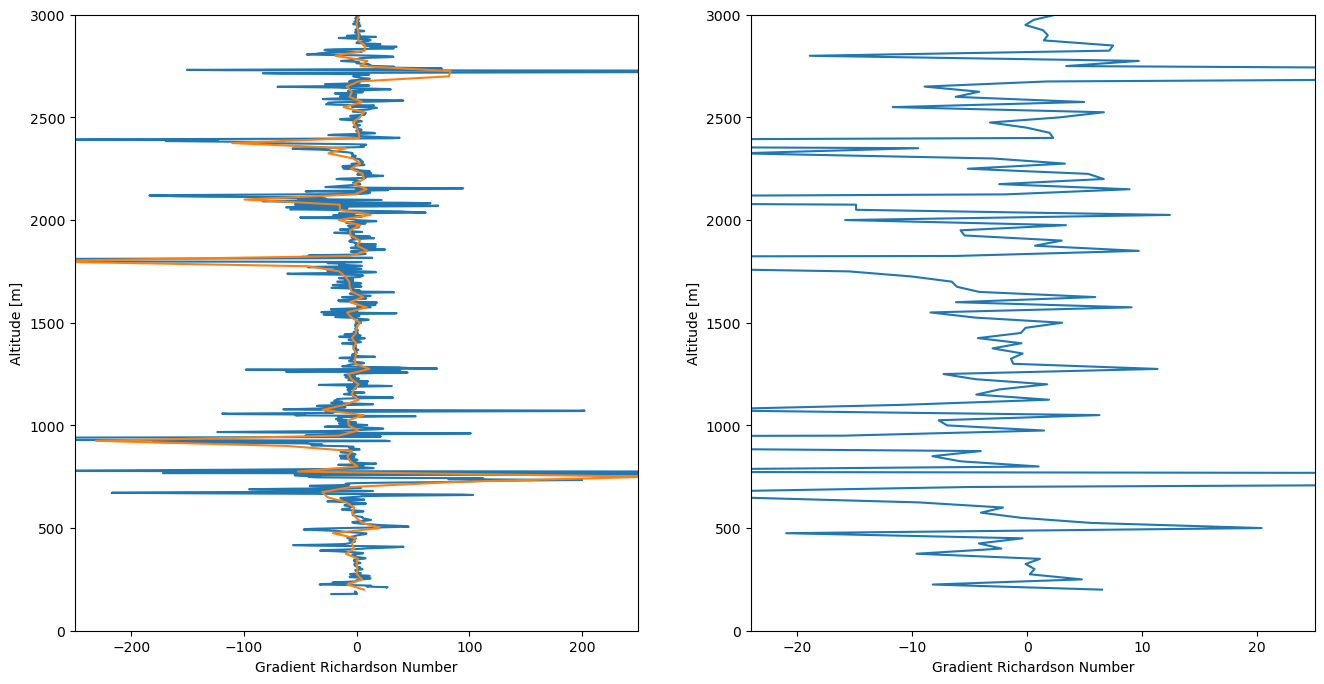

In [12]:
fig, axarr = plt.subplots(1, 2, figsize=[16, 8])

axarr[0].plot(joe, ds_hum.alt)
axarr[0].plot(kat, bin_edges[:-1])
#axarr[2].plot(ds_hum.theta, ds_hum.alt, label="Potential Temp")
axarr[0].set_ylim([0, 3000])
axarr[0].set_xlim([-250, 250])
axarr[0].set_xlabel("Gradient Richardson Number")
axarr[0].set_ylabel("Altitude [m]")

axarr[1].plot(kat, bin_edges[:-1])
#axarr[2].plot(ds_hum.theta, ds_hum.alt, label="Potential Temp")
axarr[1].set_ylim([0, 3000])
#axarr[1].set_xlim([-250, 250])
axarr[1].set_xlim([-24, 25])
axarr[1].set_xlabel("Gradient Richardson Number")
axarr[1].set_ylabel("Altitude [m]")

In [13]:
goose = ds_hum.theta_v.data - ds_hum.theta_v.data[0]

In [14]:
for i in range(0, len(goose)):
    print(goose[i], ds_hum.gpsalt.data[i])

0.0 177.9
-0.46481323 179.0
-0.90652466 179.3
-1.2580872 179.4
-1.5170288 179.5
-1.7097778 179.6
nan 179.7
nan 179.7
nan 179.8
nan 179.8
-2.1753235 179.8
-2.190857 179.9
-2.2125854 180.0
-2.2763672 180.2
-2.411438 180.4
-2.5914001 180.7
-2.770111 181.1
-2.9233093 181.5
-3.0341492 182.0
-3.0924683 182.5
-3.10083 183.1
-3.0851746 183.1
-3.077301 183.8
-3.106781 184.6
-3.1957703 184.6
-3.3341675 185.4
-3.5024414 186.2
-3.6816406 187.0
-3.8519287 187.1
-4.020569 188.1
-4.1923523 189.1
-4.343445 189.2
-4.463379 190.3
-4.568817 190.4
nan 191.6
-4.717865 192.9
-4.741913 194.2
nan 195.6
-4.8143616 196.9
-4.8320923 198.1
-4.8679504 199.3
nan 200.5
-4.9457397 201.7
-4.937378 202.9
nan 204.1
nan 205.3
nan 207.5
-4.842621 208.7
-4.7955017 209.9
-4.7510986 212.4
-4.7430725 213.7
-4.7566833 215.0
-4.7693176 216.4
-4.772217 219.1
-4.77005 220.6
-4.772888 222.0
-4.780884 225.0
-4.7890625 226.5
-4.7907715 229.7
-4.7828674 231.3
-4.7787476 232.8
-4.7893066 234.4
-4.79245 235.9
-4.7785645 237.5
-4.756988

Text(0, 0.5, 'Altitude [m]')

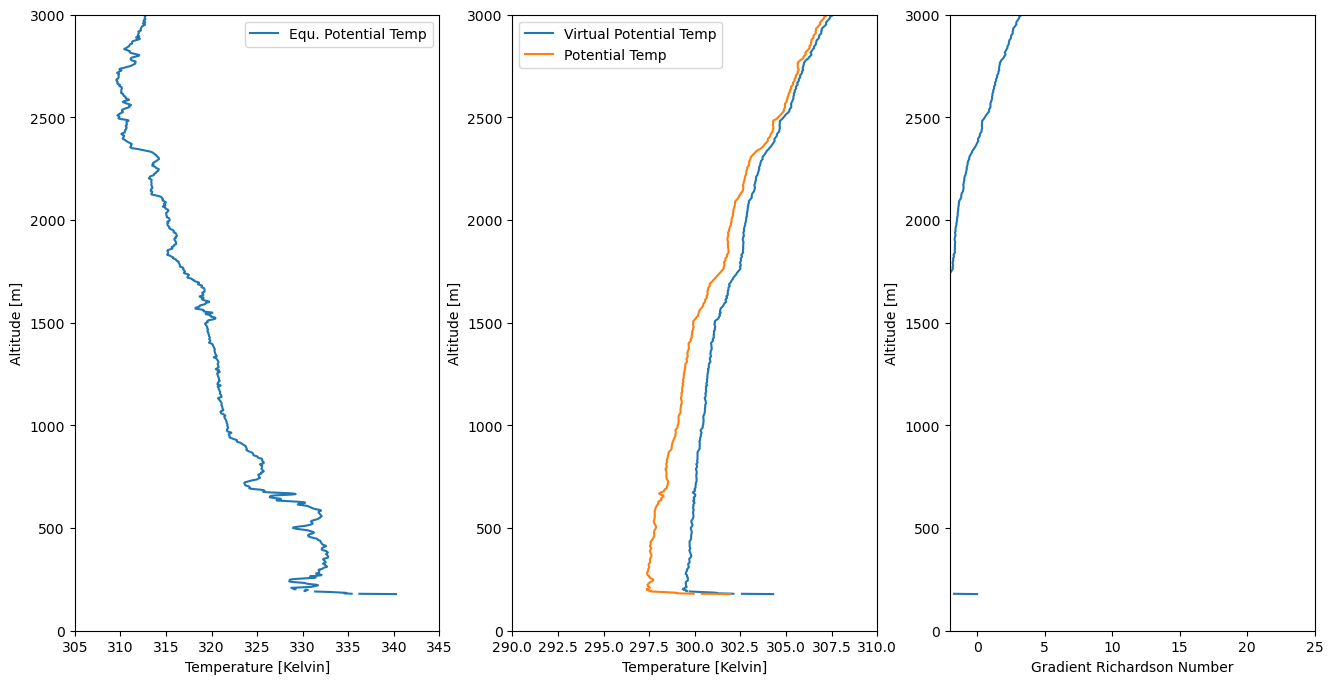

In [15]:
fig, axarr = plt.subplots(1, 3, figsize=[16, 8])

axarr[0].plot(ds_hum.theta_e, ds_hum.alt, label="Equ. Potential Temp")
axarr[0].set_ylim([0, 3000])
axarr[0].set_xlim([305, 345])
axarr[0].set_xlabel("Temperature [Kelvin]")
axarr[0].set_ylabel("Altitude [m]")
axarr[0].legend(loc='upper right')

axarr[1].plot(ds_hum.theta_v, ds_hum.alt, label="Virtual Potential Temp")
axarr[1].plot(ds_hum.theta, ds_hum.alt, label="Potential Temp")
axarr[1].set_ylim([0, 3000])
axarr[1].set_xlim([290, 310])
axarr[1].set_xlabel("Temperature [Kelvin]")
axarr[1].set_ylabel("Altitude [m]")
axarr[1].legend(loc='upper left')

axarr[2].plot(goose, ds_hum.alt,)
#axarr[2].plot(ds_hum.theta, ds_hum.alt, label="Potential Temp")
axarr[2].set_ylim([0, 3000])
axarr[2].set_xlim([-2, 25])
axarr[2].set_xlabel("Gradient Richardson Number")
axarr[2].set_ylabel("Altitude [m]")